# California Housing Dataset Linear Regression

In this project, we aim to predict California housing prices using a linear regression model built with PyTorch. The California Housing Dataset is a well-known dataset in machine learning, containing various features such as median income, average number of rooms, population, and more, which help explain the variation in housing prices across different regions in California.

Project Objectives:

- Explore the Data: Understand the distribution, trends, and relationships between the features and the target variable (median house value).
Data Preprocessing: Clean and standardize the data to ensure that our model training is robust and efficient. This includes handling missing values, splitting the data into training and testing sets, and applying feature scaling.
- Model Development: Implement a simple linear regression model using PyTorch. Linear regression is an excellent baseline for regression problems, allowing us to understand the fundamental relationships within the data.
Evaluation and Visualization: Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). Additionally, visualize the predictions against the actual values to assess how well the model fits the data.
- Through this step-by-step analysis, we will demonstrate how to build, train, and evaluate a linear regression model on the California Housing Dataset, providing insights into both the strengths and limitations of this approach.

In [7]:
import sys
import os

# Get the project root directory (one level up from 'notebooks/')
root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(root_path)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [39]:
from src.dataset import CaliforniaHousingDataset

csv_file = '../data/california_housing.csv'

df = pd.read_csv(csv_file)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
# Check data types and missing values
df.info()

# Summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


When comparing the maximum values with the 75th percentiles for these features, we notice a significant gap, which supports our suspicion that there are a few extreme outliers.

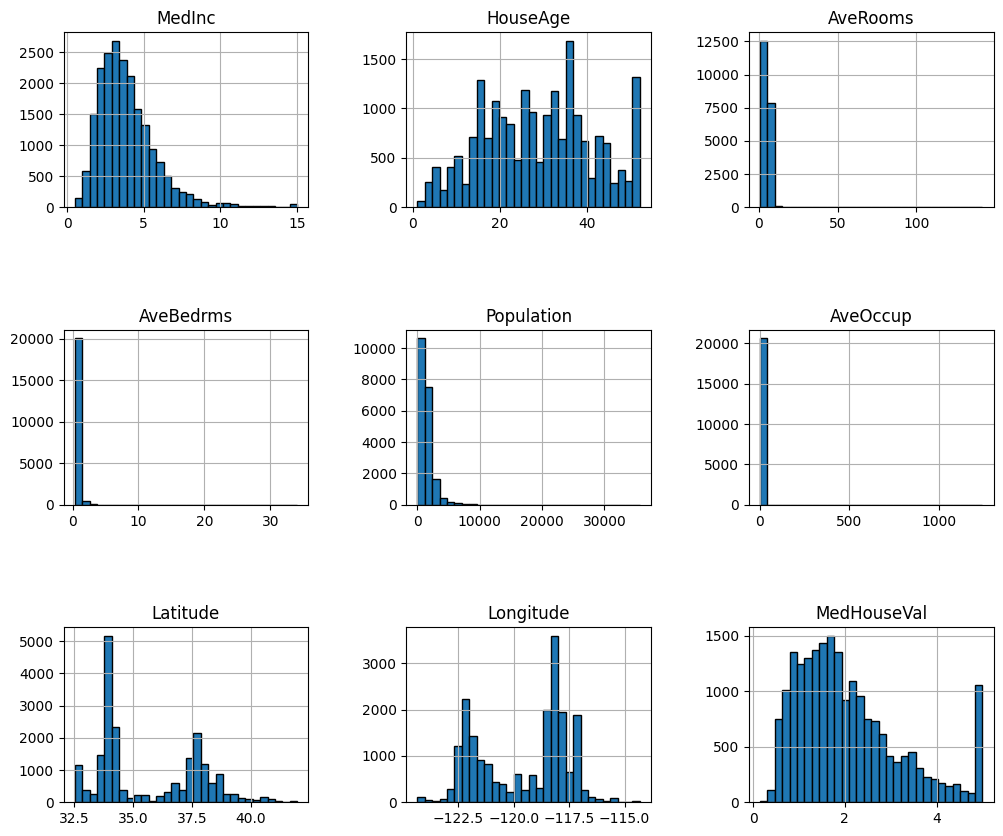

In [24]:
# Distributon of columns

df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

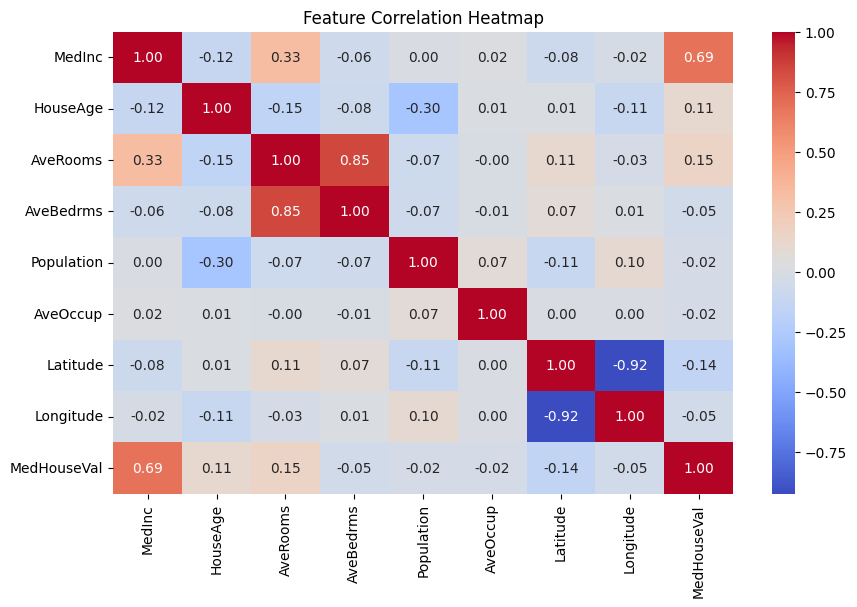

In [25]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

- Strong Positive Correlations: MedInc (0.69) with MedHouseVal → Higher income leads to higher house prices.
- Multicollinearity: AveRooms (0.85) with AveBedrms → Consider dropping one.
- Weak/No Impact on House Prices: Population & AveOccup → May be irrelevant.
- Negative Correlations: Longitude & Latitude → Location affects prices, explore further.

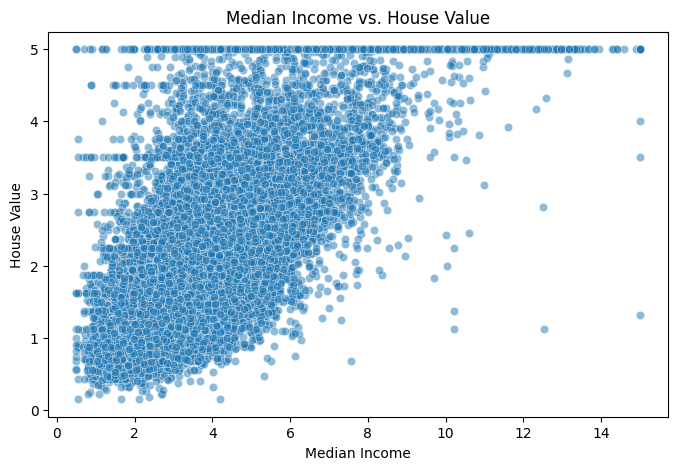

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["MedInc"], y=df["MedHouseVal"], alpha=0.5)
plt.title("Median Income vs. House Value")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.show()

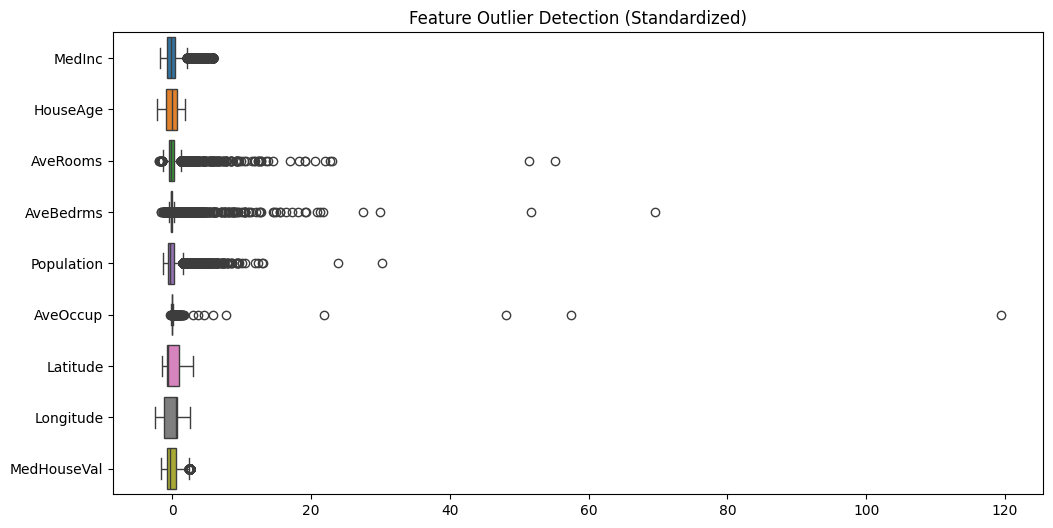

In [40]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot boxplot on standardized data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized, orient="h")
plt.title("Feature Outlier Detection (Standardized)")
plt.show()


### Dropping `Population` and `AveOccup`
We remove these features because:
- **Low correlation** with `MedHouseVal`, meaning they contribute little to the prediction.
- **High correlation with each other**, which can lead to multicollinearity, reducing model interpretability.
- **Presence of outliers**, especially in `Population`, which may affect model performance.


In [44]:
# Drop columns if they exist
columns_to_drop = ['Population', 'AveOccup']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

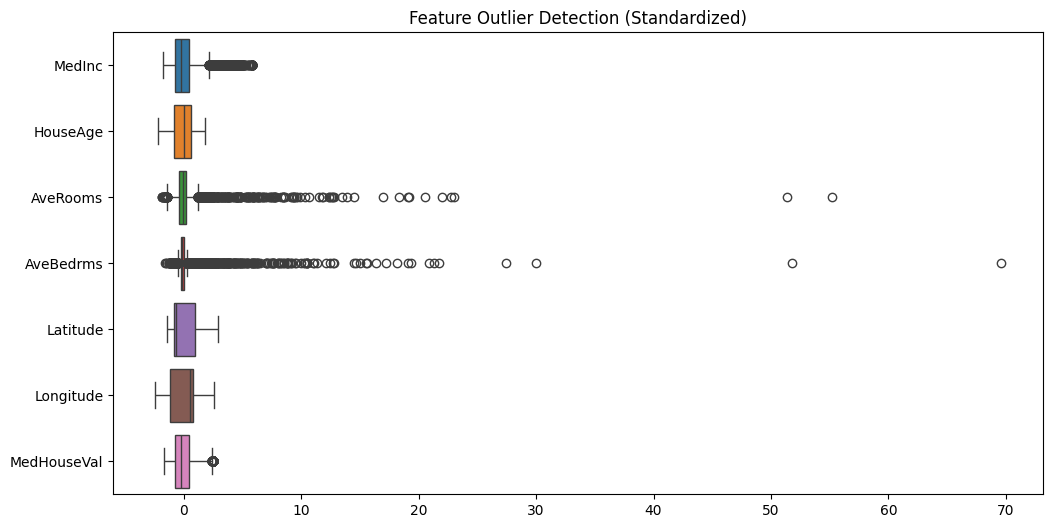

In [45]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot boxplot on standardized data without population and AveOccup
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standardized, orient="h")
plt.title("Feature Outlier Detection (Standardized)")
plt.show()

# Predicting House Prices with Linear Regression

After preprocessing the dataset, we are now ready to predict house prices using **Linear Regression**.  

### **Steps Taken:**
1. **Outlier Detection & Removal**  
   - Removed highly skewed features (**Population** and **AveOccup**) due to weak correlation with the target.  

2. **Feature Scaling**  
   - Applied **StandardScaler** to normalize features, ensuring better model performance.  

3. **Model Training**  
   - Split data into training and testing sets.  
   - Trained a **Linear Regression** model to predict `MedHouseVal` (median house value).  

4. **Evaluation**  
   - Measured performance using **Mean Squared Error (MSE)** and **R² score**.  

### **Next Steps**
- Optimize performance by **feature selection** or **regularization techniques (Ridge/Lasso)**.

🚀 **Let's train the model and make predictions!**
